# Computation


## Learning Objectives

- Do basic arithmetic with DataArrays and Datasets
- Perform aggregation (reduction) along one or multiple dimensions of a
  DataArray or Dataset


## Arithmetic Operations

Arithmetic operations with a single DataArray automatically vectorize (like
numpy) over all array values:


In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset("../data/sst.mnmean.nc")
da = ds["sst"]
da

<xarray.DataArray 'sst' (time: 128, lat: 89, lon: 180)>
[2050560 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [3]:
da + 273.15

<xarray.DataArray 'sst' (time: 128, lat: 89, lon: 180)>
array([[[271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        ...,
...
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01

## Aggregation (Reduction) Methods

Xarray supports many of the aggregations methods that numpy has. A partial list
includes: all, any, argmax, argmin, max, mean, median, min, prod, sum, std, var.

Whereas the numpy syntax would require scalar axes, xarray can use dimension
names:


In [4]:
da_mean = da.mean(dim="time")
da_mean

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[-1.7965822, -1.7966435, -1.7966874, ..., -1.7976037, -1.796984 ,
        -1.7965525],
       [-1.7968166, -1.7963768, -1.796082 , ..., -1.7992076, -1.7980535,
        -1.7973973],
       [-1.7999136, -1.798993 , -1.7984267, ..., -1.7992468, -1.7995085,
        -1.7997851],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

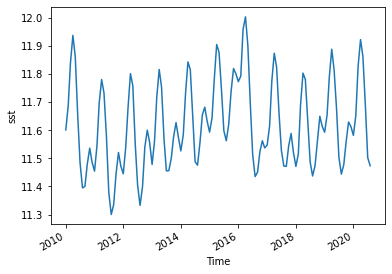

In [5]:
da.std(dim=["lat", "lon"]).plot()

## Broadcasting:

**Broadcasting** allows an operator or a function to act on two or more arrays
to operate even if these arrays do not have the same shape. That said, not all
the dimensions can be subjected to broadcasting; they must meet certain rules.
The image below t illustrates how perfoming an operation on arrays with
differenty coordinates will result in automatic broadcasting

![](../images/broadcasting.png)

Credit: Stephan Hoyer --
[xarray ECMWF Python workshop](https://docs.google.com/presentation/d/16CMY3g_OYr6fQplUZIDqVtG-SKZqsG8Ckwoj2oOqepU/edit#slide=id.g2b68f9254d_1_154)


In [6]:
da.shape, da.dims

((128, 89, 180), ('time', 'lat', 'lon'))

In [7]:
da_mean.shape, da_mean.dims

((89, 180), ('lat', 'lon'))

In [8]:
# Subtract the mean (2D array) from the original array (3D array)
x = da - da_mean
x

<xarray.DataArray 'sst' (time: 128, lat: 89, lon: 180)>
array([[[-3.4177303e-03, -3.3564568e-03, -3.3125877e-03, ...,
         -2.3962259e-03, -3.0159950e-03, -3.4474134e-03],
        [-3.1833649e-03, -3.6231279e-03, -3.9179325e-03, ...,
         -7.9238415e-04, -1.9464493e-03, -2.6026964e-03],
        [-8.6307526e-05, -1.0069609e-03, -1.5732050e-03, ...,
         -7.5316429e-04, -4.9149990e-04, -2.1481514e-04],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[-3.4177303e-03, -3.3564568e-03, -3.3125877e-03, ...,
         -2.3962259e-03, -3.0159950e-03, -3.4474134e-03],
        [-3.1833649e-03, -3.6231279e-03, -3.9179325e-03, ...,
         -7.9238415e-04, -1.9464493e-03, -2.6026964e-03],
        [-8.6307526e-05, -1.0069609e-03, -1.5732050e-03, ...,
         -7.5316429e-04, -4.9149990e-04, -2.1481514e-04],
...
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[-3.4177303e-03, -3.3564568e-03, -3.3125877e-03, ...,
         -2.3962259e-03, -3.0159950e-03, -3.4474134e-03],
        [-3.1833649e-03, -3.6231279e-03, -3.9179325e-03, ...,
         -7.9238415e-04, -1.9464493e-03, -2.6026964e-03],
        [-8.6307526e-05, -1.0069609e-03, -1.5732050e-03, ...,
         -7.5316429e-04, -4.9149990e-04, -2.1481514e-04],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01

## High level computation: groupby, resample, rolling, coarsen, weighted

Xarray has some very useful high level objects that let you do common
computations:

- `groupby` :
  [Bin data in to groups and reduce](https://xarray.pydata.org/en/stable/groupby.html)
- `resample` :
  [Groupby specialized for time axes. Either downsample or upsample your data](https://xarray.pydata.org/en/stable/time-series.html#resampling-and-grouped-operations).
- `rolling` :
  [Operate on rolling windows of your data e.g. running mean](https://xarray.pydata.org/en/stable/computation.html#rolling-window-operations)
- `coarsen` :
  [Downsample your data](https://xarray.pydata.org/en/stable/computation.html#coarsen-large-arrays)
- `weighted` :
  [Weight your data before applying reductions](https://xarray.pydata.org/en/stable/computation.html#weighted-array-reductions)


### groupby


In [9]:
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 128)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01
Data variables:
    sst      (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes:
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    geospatial_lon_min:        -1.0
    geospatial_lon_max:        359.0
    geospatial_laty_max:       89.0
    geospatial_laty_min:       -89.0
    geospatial_lat_max:        89.0
    geospatial_lat_min:        -89.0
    geospatial_lat_units:      degrees_north
    geospatial_lon_units:      degrees_east
    cdm_data_type:             Grid
    project:                   NOAA Extended Reconstructed Sea Surface Temper...
    original_publisher_url:    http://www.ncdc.noaa.gov
    References:                https://www.ncdc.noaa.gov/data-access/marineoc...
    source:                    In situ data: ICOADS R3.0 before 2015, NCEP in...
    title:                     NOAA ERSSTv5 (in situ only)
    history:                   created 07/2017 by PSD data using NCEI's ERSST...
    institution:               This version written at NOAA/ESRL PSD: obtaine...
    citation:                  Huang et al, 2017: Extended Reconstructed Sea ...
    platform:                  Ship and Buoy SSTs from ICOADS R3.0 and NCEP GTS
    standard_name_vocabulary:  CF Standard Name Table (v40, 25 January 2017)
    processing_level:          NOAA Level 4
    Conventions:               CF-1.6, ACDD-1.3
    metadata_link:             :metadata_link = https://doi.org/10.7289/V5T72...
    creator_name:              Boyin Huang (original)
    date_created:              2017-06-30T12:18:00Z (original)
    product_version:           Version 5
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2020-09-07

In [10]:
# seasonal groups
ds.groupby("time.season")

DatasetGroupBy, grouped over 'season' 
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

In [11]:
# day of the week groups
ds.groupby("time.dayofweek")

DatasetGroupBy, grouped over 'dayofweek' 
7 groups with labels 0, 1, 2, 3, 4, 5, 6.

In [12]:
# compute a seasonal mean
seasonal_mean = ds.groupby("time.season").mean()
seasonal_mean

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, season: 4)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    sst      (season, lat, lon) float32 -1.7990077 -1.7991784 ... nan nan

In [13]:
# The seasons are out of order (they are alphabetically sorted). This is a common annoyance. The solution is to use .reindex
seasonal_mean = seasonal_mean.reindex(season=["DJF", "MAM", "JJA", "SON"])
seasonal_mean

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, season: 4)
Coordinates:
  * season   (season) object 'DJF' 'MAM' 'JJA' 'SON'
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Data variables:
    sst      (season, lat, lon) float32 -1.7990077 -1.7991784 ... nan nan

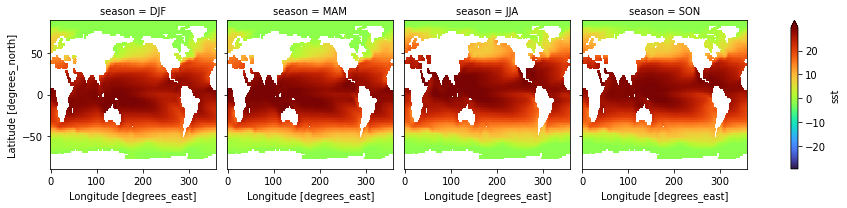

In [14]:
seasonal_mean.sst.plot(col="season", robust=True, cmap="turbo")

### resample


In [15]:
# resample to bi-monthly frequency
ds.sst.resample(time="2MS").mean()

<xarray.DataArray 'sst' (time: 64, lat: 89, lon: 180)>
array([[[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
...
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 2010-03-01 ... 2020-07-01
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

### rolling window operations


In [16]:
# A rolling mean with a window size of 7
ds.sst.rolling(time=7).mean()

<xarray.DataArray (time: 128, lat: 89, lon: 180)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[-1.8000001, -1.8000001, -1.8000001, ..., -1.8000001,
         -1.8000001, -1.8000001],
        [-1.8000001, -1.8000001, -1.8000001, ..., -1.8000001,
         -1.8000001, -1.8000001],
        [-1.8000001, -1.8000001, -1.8000001, ..., -1.8000001,
         -1.8000001, -1.8000001],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 ... 2020-08-01

## Going Further


<div class="alert alert-block alert-success">
  <p>Computation with xarray (extended version): <a href="../scipy-tutorial/03_computation_with_xarray.ipynb">Computation with xarray notebook</a></p>
  <p>Plotting and visualization (extended version): <a href="../scipy-tutorial/04_plotting_and_visualization.ipynb">Plotting and Visualization notebook</a></p>
</div>
